In [91]:
import pandas as pd

import numpy as np
import tensorflow as tf
import random as random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [92]:
df_mlp = pd.read_pickle('../../Data/output/df_process.pkl')

In [93]:
df_mlp.info

<bound method DataFrame.info of           Age  Hours per day  While working  Instrumentalist  Composer   
2   -0.600797       0.139914              0                0         0  \
3    2.998857      -0.357487              1                0         1   
4   -0.600797       0.139914              1                0         0   
5   -0.600797       0.471515              1                1         1   
6   -0.600797      -0.191686              1                1         0   
..        ...            ...            ...              ...       ...   
731 -0.684510      -0.523287              1                1         0   
732 -0.600797      -0.854887              1                1         0   
733 -0.517085       0.803115              1                0         1   
734 -0.517085       0.471515              1                1         0   
735  0.320044      -0.523287              1                0         0   

     Exploratory  Foreign languages       BPM  Frequency [Classical]   
2      

In [94]:
# columns_to_drop = ['Fav genre_Jazz', 'Fav genre_K pop', 'Fav genre_Latin', 'Fav genre_Lofi', 'Fav genre_Metal', 'Fav genre_Pop', 'Fav genre_R&B','Fav genre_Rap', 'Fav genre_Rock', 'Fav genre_Video game music', 'Fav genre_Country', 'Fav genre_EDM', 'Fav genre_Folk', 'Fav genre_Gospel', 'Fav genre_Hip hop']

# df_mlp.drop(columns_to_drop, axis=1, inplace=True)

In [95]:
df_mlp = pd.get_dummies(df_mlp, columns=['Music effects'], prefix='ME')

In [96]:
df_mlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 51 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Age                                                          718 non-null    float64
 1   Hours per day                                                718 non-null    float64
 2   While working                                                718 non-null    int64  
 3   Instrumentalist                                              718 non-null    int64  
 4   Composer                                                     718 non-null    int64  
 5   Exploratory                                                  718 non-null    int64  
 6   Foreign languages                                            718 non-null    int64  
 7   BPM                                                          718 non-null    float64


In [97]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [98]:
# music_effects = ['ME_0', 'ME_1', 'ME_2']

X = df_mlp.drop(['ME_0', 'ME_1', 'ME_2'], axis=1)
y = df_mlp[['ME_0', 'ME_1', 'ME_2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [99]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Increase the number of neurons
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Another dense layer
model.add(Dense(32, activation='relu'))  # And another
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(3, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.15, verbose=1)

Epoch 1/30
17/17 [==============================] - 1s 17ms/step - loss: 0.8445 - accuracy: 0.6409 - val_loss: 0.5581 - val_accuracy: 0.7935
Epoch 2/30
17/17 [==============================] - 0s 4ms/step - loss: 0.7454 - accuracy: 0.7143 - val_loss: 0.5803 - val_accuracy: 0.7935
Epoch 3/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.7278 - val_loss: 0.5434 - val_accuracy: 0.7935
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.7201 - val_loss: 0.5497 - val_accuracy: 0.7935
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.7355 - val_loss: 0.5467 - val_accuracy: 0.7935
Epoch 6/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.7336 - val_loss: 0.5636 - val_accuracy: 0.7935
Epoch 7/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.7375 - val_loss: 0.5640 - val_accuracy: 0.7935
Epoch 8/30
17/17 [=

In [100]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 87.38%
Test Accuracy: 72.22%


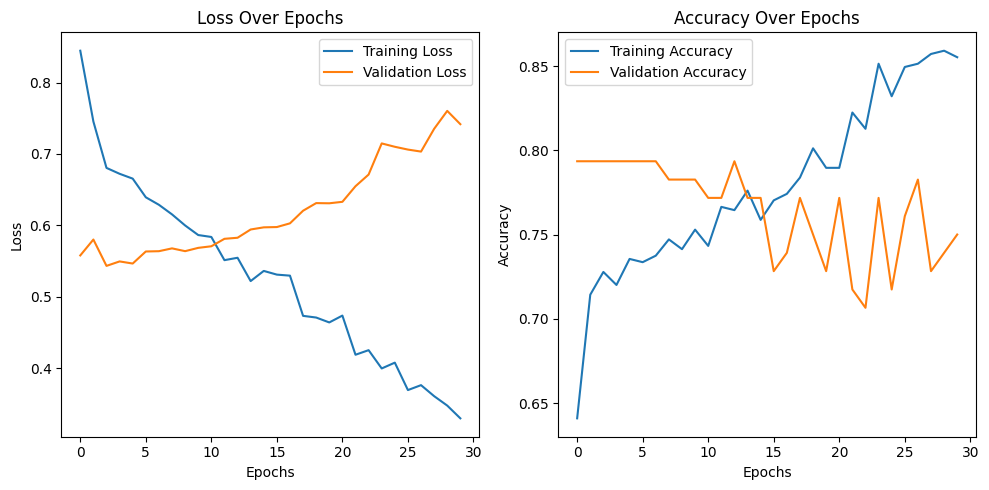

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [120]:
features = torch.tensor(df_mlp.drop(['ME_0', 'ME_1', 'ME_2'], axis=1).values).float()
targets = torch.tensor(df_mlp[['ME_0', 'ME_1', 'ME_2']].values).float()

X_train, X_test, y_train, y_test = train_test_split(features.numpy(), targets.numpy(), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = map(torch.tensor, (X_train, X_test, y_train, y_test))

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [121]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [151]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            preds = outputs > 0.5
            running_corrects += torch.sum((preds == labels.byte()).all(dim=1))

        epoch_train_loss, epoch_train_acc = train(model, train_loader, criterion, optimizer, device)
        
        # Evaluate the model on the validation set
        epoch_val_loss, epoch_val_acc = evaluate(model, test_loader, criterion, device)
        
        # Store metrics
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)
        
        # Print the metrics for the epoch
        print(f'Epoch {epoch + 1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, '
            f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}')
    
    return train_losses, train_accuracies

def evaluate(model, val_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    running_corrects = 0
    num_batches = 0  # Added to count the number of batches

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = outputs > 0.5
            running_corrects += torch.sum((preds == labels.byte()).all(dim=1))
            running_loss += loss.item() * inputs.size(0)
            num_batches += 1  # Increment the number of batches

            # Print loss for each batch
            print(f'Batch {num_batches}, Validation Loss: {loss.item()}')

    total_loss = running_loss / len(val_loader.dataset)
    total_acc = running_corrects.double() / len(val_loader.dataset)
    
    print(f'Validation - Total Loss: {total_loss:.4f}, Total Acc: {total_acc:.4f}')
    return total_loss, total_acc

In [152]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = MLP(input_size, output_size)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')

num_epochs = 25

train_losses, train_accuracies = train(model, train_loader, criterion, optimizer, num_epochs, device)
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f'Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%')

TypeError: train() missing 1 required positional argument: 'device'

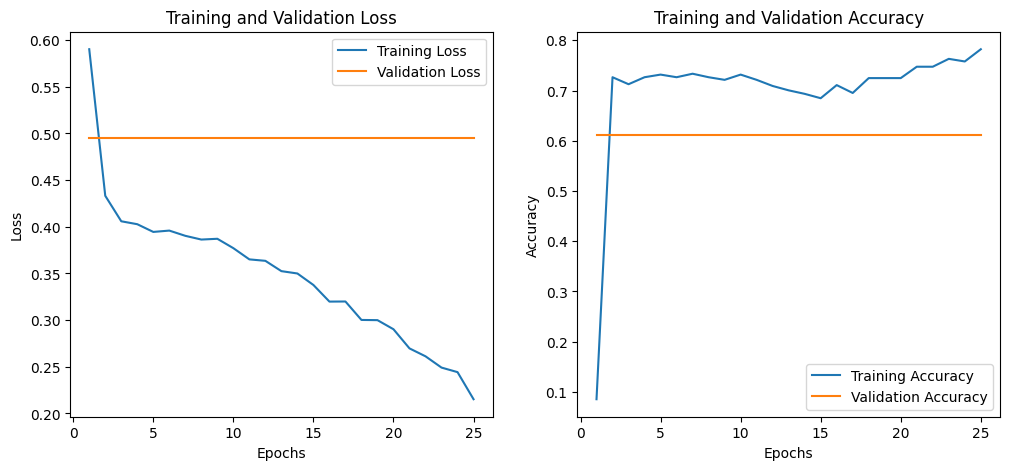

In [149]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, [test_loss] * num_epochs, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, [test_accuracy] * num_epochs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()